In [1]:
""" 
Source: [Solving the 20 dimensional Schwefel problem](https://esa.github.io/pygmo2/tutorials/solving_schwefel_20.html)
Run with `uv run {script_name.py}`
"""

import numpy as np
import matplotlib.pyplot as plt
import pygmo as pg


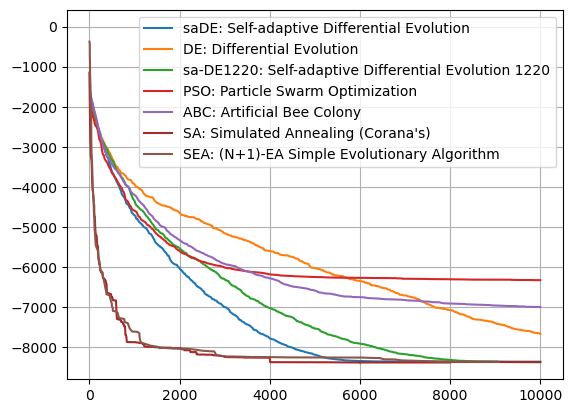

In [5]:
# The user-defined problem
udp = pg.schwefel(dim = 20)

# The pygmo problem
prob = pg.problem(udp)

# For a number of generation based algorithms we can use a similar script to run and average over 25 runs.
udas = [pg.sade(gen=500), pg.de(gen=500), pg.de1220(gen=500), pg.pso(gen=500), pg.bee_colony(gen=250, limit=20)]

for uda in udas: 
    logs = []
    
    for i in range(25):
        algo = pg.algorithm(uda)
        algo.set_verbosity(1) # regulates both screen and log verbosity
        pop = pg.population(prob, 20)
        pop = algo.evolve(pop)
        logs.append(algo.extract(type(uda)).get_log())

    logs = np.array(logs)
    avg_log = np.average(logs,0)
    plt.plot(avg_log[:,1],avg_log[:,2]-418.9829*20 , label=algo.get_name())

# For simulated annealing, since we will be using some reannealing we have to code a different script (and we will
# also not take any average for brevity)
logs = []
algo = pg.algorithm(pg.simulated_annealing(10, 0.01, 5))
algo.set_verbosity(10)
pop = pg.population(prob, 20)

for i in range(5): 
    pop = algo.evolve(pop)
    logs.append(algo.extract(pg.simulated_annealing).get_log())

for i in range(5): 
     plt.plot([l[0]+2000*i for l in logs[i]],[l[1]-418.9829*20 for l in logs[i]],"brown")
plt.plot([0,0],[1,1],"brown", label=algo.get_name()) 

# For the simple evolutionary startegy we also need ad hoc code
logs = []
algo = pg.algorithm(pg.sea(gen = 10000))
algo.set_verbosity(1)
pop = pg.population(prob, 1)
pop = algo.evolve(pop) 
logs = algo.extract(pg.sea).get_log() 
plt.plot([l[1] for l in logs],[l[2]-418.9829*20 for l in logs], label = algo.get_name()) 

# We then add details to the plot
plt.legend() 
plt.yticks([-8000,-7000,-6000,-5000,-4000,-3000,-2000,-1000,0]) 
plt.grid()


Number of objective function evaluations equals n_restarts=1 x n_adjustments=10 x bin_size=5 => 50


,Fevals,Best,Current,Mean range,Temperature
0,1.0,4948.435597,4948.435597,1.000000,10.000000
1,2.0,4948.435597,4948.435597,1.000000,10.000000
2,3.0,4948.435597,4948.435597,1.000000,10.000000
3,4.0,4948.435597,4948.435597,1.000000,10.000000
4,5.0,4725.255212,4725.255212,1.000000,10.000000
...,...,...,...,...,...
495,496.0,572.583803,572.583803,0.002289,0.019953
496,497.0,572.583803,572.583803,0.002289,0.019953
497,498.0,572.583803,572.583803,0.002289,0.019953
498,499.0,572.583803,572.583803,0.002289,0.019953


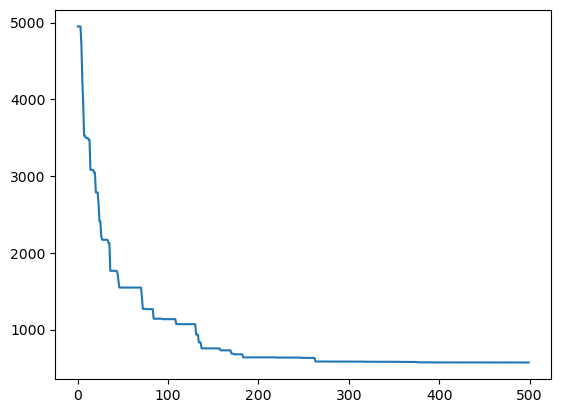

In [73]:
"""
pygmo.simulated_annealing(Ts=10., Tf=.1, n_T_adj=10, n_range_adj=10, bin_size=10, start_range=1., seed=random)

Ts (float) – starting temperature
Tf (float) – final temperature
n_T_adj (int) – number of temperature adjustments in the annealing schedule
bin_size (int) – number of mutations that are used to compute the acceptance rate
start_range (float) – starting range for mutating the decision vector
seed (int) – seed used by the internal random number generator (default is random)

At each call of the evolve method the number of fitness evaluations will be:
   n_T_adj * n_range_adj * bin_size * the problem dimension

When selecting the starting and final temperature values it helps to think about 
the temperature as the deterioration in the objective function value that still 
has a 37% chance of being accepted.
"""
# For simulated annealing, since we will be using some reannealing we have to code a different script (and we will
# also not take any average for brevity)

import pandas as pd

logs = []
n_restarts = 1
n_adjustments = 10
bin_size = 5

udp = pg.schwefel(dim = 10)
prob = pg.problem(udp)

algo = pg.algorithm(pg.simulated_annealing(Ts=10, Tf=0.01, n_T_adj=n_adjustments, bin_size=bin_size))
algo.set_verbosity(1)
pop = pg.population(prob, 1)

for i in range(n_restarts): #  reannealings, basically means restarting the algorithm starting from the last population
    pop = algo.evolve(pop)
    logs.append(algo.extract(pg.simulated_annealing).get_log())

logs_df = pd.DataFrame(np.concatenate(logs), columns=["Fevals", "Best", "Current", "Mean range", "Temperature"])

print(f"Number of objective function evaluations equals {n_restarts=} x {n_adjustments=} x {bin_size=} => {n_restarts*n_adjustments*bin_size}")

display(logs_df)

# plot "Best"
plt.plot(logs_df["Best"], label=algo.get_name())


In [74]:
prob


Problem name: Schwefel Function
	C++ class name: pagmo::schwefel

	Global dimension:			10
	Integer dimension:			0
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [-500, -500, -500, -500, -500, ... ]
	Upper bounds: [500, 500, 500, 500, 500, ... ]
	Has batch fitness evaluation: false

	Has gradient: false
	User implemented gradient sparsity: false
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 0

	Thread safety: basic